In [1]:
import pandas as pd
import numpy as np

In [2]:
YK_label = pd.read_excel('../data/YK_LABEL.xlsx')
YK_data = pd.read_csv('../data/YK_training_ULT.csv')

In [3]:
#Looking at the shape of each dataset
print(YK_data.shape)

(69577, 1076)


In [4]:
#Function to drop columns (tests) in the raw data file which are NOT tests (i.e metadata like start time, lot number etc)
def test_only(datafile,labelfile):
    keys = list(labelfile['Name'])
    df = datafile[keys]
    return df

In [ ]:
#Applying the functions to file 
YK_dropped = test_only(YK_data,YK_label)
#Checking the shape and how the data looks like
print(YK_dropped.shape)
print(YK_dropped.head())

## Identify the applicable columns (i.e those with a label)
Those without a label will be dropped, since there will not be any response variable (distribution of categories) to predict the predictor variable (data points)

In [6]:
#Function to find out non applicable rows (no distribution, not part of training data)
def non_applicable (df_label):
    null_rowsLabel = df_label[df_label['Distribution Type'].isnull()]
    null_rowsLabel = list(null_rowsLabel['Name'])
    return null_rowsLabel

In [7]:
#Applying the above function to set of data
YK_non_applicable = non_applicable(YK_label)
#Printing the tests (columns) to see which tests do not have a distribution (i.e not applicable)
print(YK_non_applicable)
print(len(YK_non_applicable))

['otp_read_line0_stdf_:ULT_Chksum@ULT_Chksum[1]', 'otp_read_blank:Functional[1]', 'tdf_50k_1_f_:Functional[1]', 'tdf_50k_4_f_:Functional[1]', 'tdf_50k_9_f_:Functional[1]', 'tdf_50k_8_f_:Functional[1]', 'otp_read_line0_sva_f_:Functional[1]', 'tdf_50k_10_f_:Functional[1]', 'tdf_90k_2_f_:Functional[1]', 'tdf_90k_7_f_:Functional[1]', 'tdf_90k_8_f_:Functional[1]', 'tdf_90k_10_f_:Functional[1]', 'tdf_90k_11_f_:Functional[1]', 'tdf_90k_15_f_:Functional[1]']
14


## Pre-processing the label file
The codes above are for the raw data (The data points for each test).The labels under the label file (YK_label) are the categorical variables denoting the distribution of each test (each column in the raw data file). There are 6 labels/distribution categories - outlier, normal, longtail, functional, discrete and bimodal. Now we will process the label files and identify those rows where there are no distribution (not applicable) and proceed to drop them. 

In [8]:
#Function to faciliate the dropping of the null rows in labels file
def drop_null_labels(label_df,not_applicable):
    df = label_df.drop(label_df[label_df.Name.isin(not_applicable)].index)
    return df

In [9]:
#Applying it to set of data
YK_label_final = drop_null_labels(YK_label,YK_non_applicable)
YK_label_final

,Name,Mean,Standard Deviation,Distribution Type
0,temperature,25.000000,0.000000,functional
1,Device_Test_Time,16119.452606,1143.346961,longtail
3,Part_Id,7088.813185,4964.820066,longtail
5,g2bist_efuse_blank_read_f_:Functional[1],-1.000000,0.000000,functional
7,tdf_50k_2_f_:Functional[1],-0.750000,0.500000,functional
...,...,...,...,...
1034,tdf_90k_5_p_:Functional[1],-1.000000,0.000000,functional
1035,tdf_90k_6_p_:Functional[1],-1.000000,0.000000,functional
1036,tdf_90k_7_p_:Functional[1],-1.000000,0.000000,functional
1037,tdf_90k_8_p_:Functional[1],-1.000000,0.000000,functional


In [10]:
YK_target = YK_label_final[['Name','Distribution Type']]
YK_target

,Name,Distribution Type
0,temperature,functional
1,Device_Test_Time,longtail
3,Part_Id,longtail
5,g2bist_efuse_blank_read_f_:Functional[1],functional
7,tdf_50k_2_f_:Functional[1],functional
...,...,...
1034,tdf_90k_5_p_:Functional[1],functional
1035,tdf_90k_6_p_:Functional[1],functional
1036,tdf_90k_7_p_:Functional[1],functional
1037,tdf_90k_8_p_:Functional[1],functional


# Visualizing the distribution of the distribution types

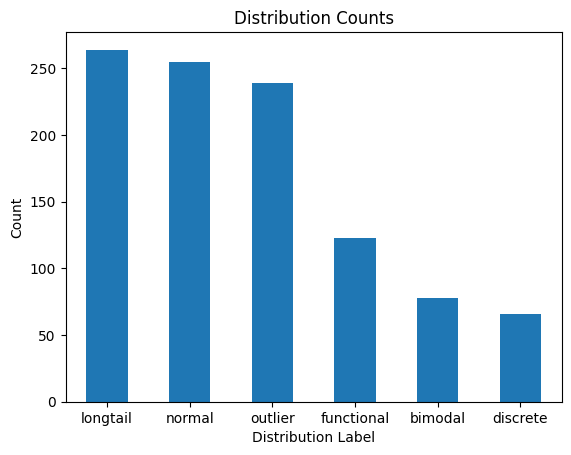

In [121]:
distribution_counts = YK_target['Distribution Type'].value_counts()

import matplotlib.pyplot as plt

distribution_counts.plot(kind='bar')
plt.title('Distribution Counts')
plt.xlabel('Distribution Label')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

In [11]:
YK_transposed = YK_dropped.T.reset_index(inplace=False, drop=False)

YK_transposed.columns = ['Name'] + [i for i in range(1, len(YK_transposed.columns))]
YK_transposed

,Name,1,2,3,4,5,6,7,8,9,...,69568,69569,69570,69571,69572,69573,69574,69575,69576,69577
0,temperature,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,...,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
1,Device_Test_Time,22332.0,11976.0,11920.0,9224.0,11936.0,11914.0,11893.0,11904.0,11882.0,...,9833.0,12648.0,12648.0,12648.0,12648.0,12648.0,12648.0,12648.0,4375.0,4375.0
2,otp_read_line0_stdf_:ULT_Chksum@ULT_Chksum[1],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Part_Id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,312.0,313.0,314.0,315.0,316.0,317.0,318.0,319.0,320.0,321.0
4,otp_read_blank:Functional[1],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,tdf_90k_5_p_:Functional[1],-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,NaN,NaN,NaN
1035,tdf_90k_6_p_:Functional[1],-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,NaN,NaN,-1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN
1036,tdf_90k_7_p_:Functional[1],-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,NaN,NaN,-1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN
1037,tdf_90k_8_p_:Functional[1],-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,NaN,NaN,-1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN


In [12]:
# Combined dataframe of X and Y
df_merged = pd.merge(YK_target, YK_transposed, on='Name', how='inner')

In [13]:
# transpose the entire dataframe for feature engineering as statistical properties are more easily derived per column
df_yk = df_merged.T
df_yk

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
Name,temperature,Device_Test_Time,Part_Id,g2bist_efuse_blank_read_f_:Functional[1],tdf_50k_2_f_:Functional[1],stf_50k_1_f_:Functional[1],write_dro_sidd:Functional[1],brf1_fsm_tx_:Functional[1],otp_array_readout_min:Functional[1],bbud_lpbk_min:Functional[1],...,tdf_90k_18_p_:Functional[1],tdf_90k_1_p_:Functional[1],tdf_90k_2_p_:Functional[1],tdf_90k_3_p_:Functional[1],tdf_90k_4_p_:Functional[1],tdf_90k_5_p_:Functional[1],tdf_90k_6_p_:Functional[1],tdf_90k_7_p_:Functional[1],tdf_90k_8_p_:Functional[1],tdf_90k_9_p_:Functional[1]
Distribution Type,functional,longtail,longtail,functional,functional,functional,functional,functional,functional,functional,...,functional,functional,functional,functional,functional,functional,functional,functional,functional,functional
1,25.0,22332.0,1.0,NaN,NaN,NaN,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,25.0,11976.0,2.0,NaN,NaN,NaN,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,25.0,11920.0,3.0,NaN,NaN,NaN,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69573,25.0,12648.0,317.0,NaN,NaN,NaN,-1.0,-1.0,-1.0,-1.0,...,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
69574,25.0,12648.0,318.0,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,...,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,NaN,NaN,NaN
69575,25.0,12648.0,319.0,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,...,NaN,-1.0,-1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN
69576,25.0,4375.0,320.0,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# extract out the features 
features_yk = df_yk.iloc[2:]
features_yk

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
1,25.0,22332.0,1.0,NaN,NaN,NaN,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,25.0,11976.0,2.0,NaN,NaN,NaN,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,25.0,11920.0,3.0,NaN,NaN,NaN,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,25.0,9224.0,4.0,NaN,NaN,NaN,-1.0,-1.0,NaN,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
5,25.0,11936.0,5.0,NaN,NaN,NaN,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69573,25.0,12648.0,317.0,NaN,NaN,NaN,-1.0,-1.0,-1.0,-1.0,...,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
69574,25.0,12648.0,318.0,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,...,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,NaN,NaN,NaN
69575,25.0,12648.0,319.0,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,...,NaN,-1.0,-1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN
69576,25.0,4375.0,320.0,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# extract out the target labels
labels_yk = df_yk.iloc[:2]
labels_yk

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
Name,temperature,Device_Test_Time,Part_Id,g2bist_efuse_blank_read_f_:Functional[1],tdf_50k_2_f_:Functional[1],stf_50k_1_f_:Functional[1],write_dro_sidd:Functional[1],brf1_fsm_tx_:Functional[1],otp_array_readout_min:Functional[1],bbud_lpbk_min:Functional[1],...,tdf_90k_18_p_:Functional[1],tdf_90k_1_p_:Functional[1],tdf_90k_2_p_:Functional[1],tdf_90k_3_p_:Functional[1],tdf_90k_4_p_:Functional[1],tdf_90k_5_p_:Functional[1],tdf_90k_6_p_:Functional[1],tdf_90k_7_p_:Functional[1],tdf_90k_8_p_:Functional[1],tdf_90k_9_p_:Functional[1]
Distribution Type,functional,longtail,longtail,functional,functional,functional,functional,functional,functional,functional,...,functional,functional,functional,functional,functional,functional,functional,functional,functional,functional


# Scaling the features
Standardization is chosen over min-max scaling as it is less sensitive to outliers. Standardization preserves the relative differences between data points even with the presence of outliers. Under min-max scaling, outliers will compress the range of the majority of the data which potentially distort the distributions.

In [16]:
# standardize the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_data = scaler.fit_transform(features_yk)

In [17]:
scaled_features_yk = pd.DataFrame(normalized_data)
scaled_features_yk

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,0.0,5.433689,-1.427618,NaN,NaN,NaN,0.0,0.0,0.0,-0.013989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,-3.623994,-1.427416,NaN,NaN,NaN,0.0,0.0,0.0,-0.013989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,-3.672973,-1.427215,NaN,NaN,NaN,0.0,0.0,0.0,-0.013989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,-6.030980,-1.427013,NaN,NaN,NaN,0.0,0.0,NaN,-0.013989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,-3.658979,-1.426812,NaN,NaN,NaN,0.0,0.0,0.0,-0.013989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69572,0.0,-3.036242,-1.363969,NaN,NaN,NaN,0.0,0.0,0.0,-0.013989,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69573,0.0,-3.036242,-1.363768,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
69574,0.0,-3.036242,-1.363566,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
69575,0.0,-10.272067,-1.363365,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Feature Engineering
Statistical Properties

In [18]:
from scipy.stats import skew, kurtosis, norm, kstest, zscore
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import warnings

def statistical_features(df):
    feature_vectors = []

    for column in df.columns:
        values = df[column].dropna()

        mean = values.mean()
        median = values.median()
        std_dev = values.std()
        iqr = values.quantile(0.75) - values.quantile(0.25)
        # skewness = skew(values)
        # kurt = kurtosis(values)
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            try:
                skewness = skew(values)
                kurt = kurtosis(values)
            except RuntimeWarning:
                skewness = np.nan
                kurt = np.nan
        min_value = values.min()
        max_value = values.max()
        range = max_value - min_value
        p95 = values.quantile(0.95)
        p5 = values.quantile(0.05)
        percentile_ratio = p95 / p5 if p5 != 0 else np.nan
        tail_weight_ratio = np.sum((values > (median + 1.5*iqr)) | (values < (median - 1.5*iqr))) / len(values)
        excess_kurtosis = kurt - 3
        p99 = values.quantile(0.99)
        p1 = values.quantile(0.01)

        feature_vector = {
            'Mean': mean,
            'Median': median,
            'Std_Dev': std_dev,
            'IQR': iqr,
            'Skewness': skewness,
            'Kurtosis': kurt,
            'Min': min_value,
            'Max': max_value,
            'Range': range,
            'Percentile_Ratio_95_5': percentile_ratio,
            'Tail_Weight_Ratio': tail_weight_ratio,
            'Excess_Kurtosis': excess_kurtosis,
            'P99': p99,
            'P1': p1
        }
        feature_vectors.append(feature_vector)

    features_df = pd.DataFrame(feature_vectors)
    return features_df

In [35]:
# applying function on the features 
statistical_features = statistical_features(scaled_features_yk)
statistical_features.head()

,Mean,Median,Std_Dev,IQR,Skewness,Kurtosis,Min,Max,Range,Percentile_Ratio_95_5,Tail_Weight_Ratio,Excess_Kurtosis,P99,P1
0,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000
1,1.830048e-16,0.252373,1.000007,0.443438,-6.338681,49.533672,-12.225994,9.234837,21.460831,-0.983337,0.079063,46.533672,0.687064,-5.402994
2,1.045742e-16,-0.129072,1.000007,1.597451,0.435881,-0.729177,-1.427618,2.492794,3.920412,-1.302537,0.016112,-3.729177,2.352655,-1.418352
3,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000
4,-5.551115e-17,-0.577350,1.154701,0.577350,1.154701,-0.666667,-0.577350,1.732051,2.309401,-2.400000,0.250000,-3.666667,1.662769,-0.577350


Outlier detection and counting

In [20]:
from scipy.stats import norm, kstest, zscore
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

def outlier_detection(df):
    feature_vectors = []
    
    for column in df.columns:
        values = df[column].dropna()

        # Outlier detection using z-score
        zscores = zscore(values)
        outliers_zscore = zscores.abs() > 3 
        count_outliers_zscore = outliers_zscore.sum()

        # Outlier detection using IQR
        Q1 = values.quantile(0.25)
        Q3 = values.quantile(0.75)
        IQR = Q3 - Q1   
        outliers_iqr = ((values < (Q1 - 1.5 * IQR)) | values > (Q3 + 1.5 * IQR))
        count_outliers_iqr = outliers_iqr.sum()

        # #Outlier detection using DBSCAN clustering
        # scaler = StandardScaler()
        # scaled_data = scaler.fit_transform(values.values.reshape(-1, 1)) #Convery into numpy array then reshape 1D array into a 2D array with one column
        # db = DBSCAN(eps=0.5, min_samples=5).fit(scaled_data)
        # outliers_dbscan = db.labels_ == -1
        # count_outliers_dbscan = np.sum(outliers_dbscan)

        feature_vector = {
            'Outliers_Zscore': count_outliers_zscore,
            'Outliers_IQR': count_outliers_iqr
            #,'Outliers_DBSCAN': count_outliers_dbscan
        }

        feature_vectors.append(feature_vector)

    features_df = pd.DataFrame(feature_vectors)
    return features_df

In [120]:
# applying function on the features
outlier_features = outlier_detection(scaled_features_yk)
outlier_features.head()

,Outliers_Zscore,Outliers_IQR
0,0,0
1,1197,69577
2,0,0
3,0,0
4,0,4


Goodness-of-fit parameters using Normal distribution

In [33]:
from scipy.stats import norm, lognorm, gamma

def goodness_of_fit(df):
    feature_vectors = []
    
    for column in df.columns:
        values = df[column].dropna()

        # Fit normal distribution -> useful for symmetrical distribution
        mean, std_dev = norm.fit(values)
        ks_stat_norm, ks_p_value_norm = kstest(values, 'norm', args=(mean, std_dev))

        # Fit log distribution -> useful for data with a long right tail
        epsilon = 1e-10
        #transformed_values = np.log(values + epsilon)
        #positive_values = values[values > 0]
        #shape, loc, scale = lognorm.fit(transformed_values, floc=0) 
        #ks_stat_lognorm, ks_p_value_lognorm = kstest(transformed_values, 'lognorm', args=(shape, loc, scale))

        # Fit gamma distribution -> can model skewed data with positive values
        # shape, loc, scale = gamma.fit(values, floc=0)
        # ks_stat_gamma, ks_p_value_gamma = kstest(values, 'gamma', args=(shape, loc, scale))

        feature_vector = {
            'KS_Stat_norm': ks_stat_norm,
            'KS_P_value_norm': ks_p_value_norm
            #,'KS_Stat_lognorm': ks_stat_lognorm,
            #'KS_P_value_lognorm': ks_p_value_lognorm,
            #'KS_Stat_gamma': ks_stat_gamma,
            #'KS_P_value_gamma': ks_p_value_gamma
        }
        
        feature_vectors.append(feature_vector)
    
    features_df = pd.DataFrame(feature_vectors)
    return features_df

In [37]:
# applying function on the features
fitting_features = goodness_of_fit(scaled_features_yk)
fitting_features.head()

/opt/homebrew/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2069: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


,KS_Stat_norm,KS_P_value_norm
0,NaN,NaN
1,0.310838,0.000000
2,0.076701,0.000000
3,NaN,NaN
4,0.468149,0.249377


# Generating the feature space 
Combining all 3 sets of the engineered features above into one dataframe

In [60]:
# Combining the engineered features into one feature set
features_final_yk = pd.concat([statistical_features, outlier_features, fitting_features], axis=1)
features_final_yk

,Mean,Median,Std_Dev,IQR,Skewness,Kurtosis,Min,Max,Range,Percentile_Ratio_95_5,Tail_Weight_Ratio,Excess_Kurtosis,P99,P1,Outliers_Zscore,Outliers_IQR,KS_Stat_norm,KS_P_value_norm
0,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0,0,NaN,NaN
1,1.830048e-16,0.252373,1.000007,0.443438,-6.338681,49.533672,-12.225994,9.234837,21.460831,-0.983337,0.079063,46.533672,0.687064,-5.402994,1197,69577,0.310838,0.000000
2,1.045742e-16,-0.129072,1.000007,1.597451,0.435881,-0.729177,-1.427618,2.492794,3.920412,-1.302537,0.016112,-3.729177,2.352655,-1.418352,0,0,0.076701,0.000000
3,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0,0,NaN,NaN
4,-5.551115e-17,-0.577350,1.154701,0.577350,1.154701,-0.666667,-0.577350,1.732051,2.309401,-2.400000,0.250000,-3.666667,1.662769,-0.577350,0,4,0.468149,0.249377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0,0,NaN,NaN
1021,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0,0,NaN,NaN
1022,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0,0,NaN,NaN
1023,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0,0,NaN,NaN


# Combining feature space with its corresponding target labels

In [61]:
# Combining the final features with the target labels
df_final_yk = pd.concat([labels_yk.T, features_final_yk], axis=1)
df_final_yk

,Name,Distribution Type,Mean,Median,Std_Dev,IQR,Skewness,Kurtosis,Min,Max,Range,Percentile_Ratio_95_5,Tail_Weight_Ratio,Excess_Kurtosis,P99,P1,Outliers_Zscore,Outliers_IQR,KS_Stat_norm,KS_P_value_norm
0,temperature,functional,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0,0,NaN,NaN
1,Device_Test_Time,longtail,1.830048e-16,0.252373,1.000007,0.443438,-6.338681,49.533672,-12.225994,9.234837,21.460831,-0.983337,0.079063,46.533672,0.687064,-5.402994,1197,69577,0.310838,0.000000
2,Part_Id,longtail,1.045742e-16,-0.129072,1.000007,1.597451,0.435881,-0.729177,-1.427618,2.492794,3.920412,-1.302537,0.016112,-3.729177,2.352655,-1.418352,0,0,0.076701,0.000000
3,g2bist_efuse_blank_read_f_:Functional[1],functional,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0,0,NaN,NaN
4,tdf_50k_2_f_:Functional[1],functional,-5.551115e-17,-0.577350,1.154701,0.577350,1.154701,-0.666667,-0.577350,1.732051,2.309401,-2.400000,0.250000,-3.666667,1.662769,-0.577350,0,4,0.468149,0.249377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,tdf_90k_5_p_:Functional[1],functional,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0,0,NaN,NaN
1021,tdf_90k_6_p_:Functional[1],functional,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0,0,NaN,NaN
1022,tdf_90k_7_p_:Functional[1],functional,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0,0,NaN,NaN
1023,tdf_90k_8_p_:Functional[1],functional,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0,0,NaN,NaN


# Binary labelling
Target labels (distribution type) are converted into binary variable. Outlier and Longtail are grouped together, while the remaining distributions are grouped together separately.

In [57]:
# function to relabel target variable into binary values, where outlier and longtail are grouped together
def relabel_data(original_label):
    if original_label in ['outlier', 'longtail']:  
        return 'Outlier/Longtail'
    else:
        return 'Other'

In [62]:
# new column added with the updated labels 
df_final_yk['Target'] = df_final_yk['Distribution Type'].apply(relabel_data)

In [63]:
# sorting the columns for easier viewing of target labels
reordered_columns = ['Name'] + ['Target'] + [col for col in df_final_yk.columns if col not in ['Target', 'Name']]
df_final_yk = df_final_yk[reordered_columns]
df_final_yk

,Name,Target,Distribution Type,Mean,Median,Std_Dev,IQR,Skewness,Kurtosis,Min,...,Range,Percentile_Ratio_95_5,Tail_Weight_Ratio,Excess_Kurtosis,P99,P1,Outliers_Zscore,Outliers_IQR,KS_Stat_norm,KS_P_value_norm
0,temperature,Other,functional,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN,0.000000,...,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0,0,NaN,NaN
1,Device_Test_Time,Outlier/Longtail,longtail,1.830048e-16,0.252373,1.000007,0.443438,-6.338681,49.533672,-12.225994,...,21.460831,-0.983337,0.079063,46.533672,0.687064,-5.402994,1197,69577,0.310838,0.000000
2,Part_Id,Outlier/Longtail,longtail,1.045742e-16,-0.129072,1.000007,1.597451,0.435881,-0.729177,-1.427618,...,3.920412,-1.302537,0.016112,-3.729177,2.352655,-1.418352,0,0,0.076701,0.000000
3,g2bist_efuse_blank_read_f_:Functional[1],Other,functional,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN,0.000000,...,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0,0,NaN,NaN
4,tdf_50k_2_f_:Functional[1],Other,functional,-5.551115e-17,-0.577350,1.154701,0.577350,1.154701,-0.666667,-0.577350,...,2.309401,-2.400000,0.250000,-3.666667,1.662769,-0.577350,0,4,0.468149,0.249377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,tdf_90k_5_p_:Functional[1],Other,functional,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN,0.000000,...,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0,0,NaN,NaN
1021,tdf_90k_6_p_:Functional[1],Other,functional,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN,0.000000,...,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0,0,NaN,NaN
1022,tdf_90k_7_p_:Functional[1],Other,functional,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN,0.000000,...,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0,0,NaN,NaN
1023,tdf_90k_8_p_:Functional[1],Other,functional,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN,0.000000,...,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0,0,NaN,NaN


# Visualizing the updated distribution of the binary distribution types

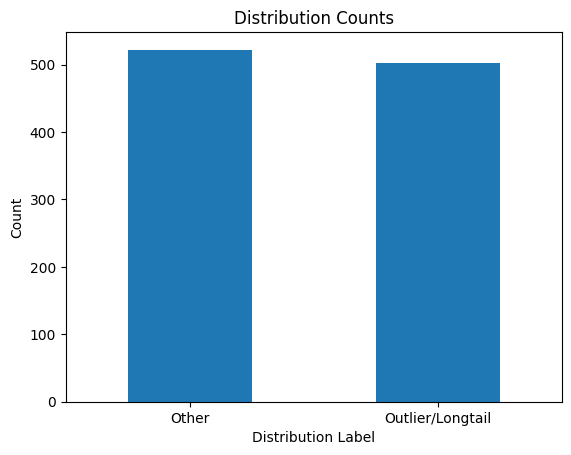

In [122]:
binary_distribution_counts = df_final_yk['Target'].value_counts()

binary_distribution_counts.plot(kind='bar')
plt.title('Distribution Counts')
plt.xlabel('Distribution Label')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

# Checking for null values
As expected those null features come from 'other' distribution as the values are too close or identical to calulcate certain statistical parameters

In [68]:
# filter rows where any column has null values
null_df = df_final_yk[df_final_yk.isnull().any(axis=1)]

# check the target label (distribution) of these null rows
null_df['Target'].value_counts()

Other    123
Name: Target, dtype: int64

In [78]:
# drop those rows (tests) with any null values for more consistency and since all are of the negative class 
df_final_yk_nonull = df_final_yk.dropna()
df_final_yk_nonull

,Name,Target,Distribution Type,Mean,Median,Std_Dev,IQR,Skewness,Kurtosis,Min,...,Range,Percentile_Ratio_95_5,Tail_Weight_Ratio,Excess_Kurtosis,P99,P1,Outliers_Zscore,Outliers_IQR,KS_Stat_norm,KS_P_value_norm
1,Device_Test_Time,Outlier/Longtail,longtail,1.830048e-16,0.252373,1.000007,0.443438,-6.338681,49.533672,-12.225994,...,21.460831,-0.983337,0.079063,46.533672,0.687064,-5.402994,1197,69577,0.310838,0.000000e+00
2,Part_Id,Outlier/Longtail,longtail,1.045742e-16,-0.129072,1.000007,1.597451,0.435881,-0.729177,-1.427618,...,3.920412,-1.302537,0.016112,-3.729177,2.352655,-1.418352,0,0,0.076701,0.000000e+00
4,tdf_50k_2_f_:Functional[1],Other,functional,-5.551115e-17,-0.577350,1.154701,0.577350,1.154701,-0.666667,-0.577350,...,2.309401,-2.400000,0.250000,-3.666667,1.662769,-0.577350,0,4,0.468149,2.493775e-01
5,stf_50k_1_f_:Functional[1],Other,functional,-3.062684e-16,-0.219529,1.001440,0.000000,4.335688,16.798193,-0.219529,...,4.774745,1.000000,0.045977,13.798193,4.555217,-0.219529,16,348,0.540904,7.438422e-96
9,bbud_lpbk_min:Functional[1],Other,functional,2.676980e-15,-0.013989,1.000008,0.000000,71.472427,5106.307888,-0.013989,...,71.500405,1.000000,0.000196,5103.307888,-0.013989,-0.013989,13,66447,0.505385,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,read_dro_cal_:lvt_avg@TDO[1],Outlier/Longtail,longtail,-1.935976e-15,0.063400,1.000007,1.403359,-0.388876,0.348104,-5.582783,...,9.184296,-0.877230,0.033191,-2.651896,2.026222,-2.505583,331,0,0.031423,8.893522e-60
987,read_dro_cal_:hcram_avg@TDO[1],Outlier/Longtail,longtail,1.768345e-15,0.016498,1.000007,1.170957,0.719587,10.133059,-6.149688,...,15.073135,-0.922667,0.041546,7.133059,1.818790,-2.831977,880,0,0.040870,7.751552e-101
990,stdf_svc_index_:limit@SVC_index[1],Other,discrete,9.861373e-17,0.172446,1.000007,1.142333,0.361182,0.220590,-3.254552,...,7.996329,-1.355599,0.062555,-2.779410,2.457111,-2.112220,246,0,0.216699,0.000000e+00
991,stdf_svc_volt_vmax:limit@SVC_V11_Vmax[1],Other,discrete,-3.504640e-12,0.228256,1.000007,1.241932,-0.055177,-0.723538,-3.497541,...,4.967729,-1.450352,0.033395,-3.723538,1.470188,-2.255609,32,0,0.225499,0.000000e+00


# Saving data into pickled file

In [123]:
import pickle

data = {'yk_full': df_final_yk, 'yk_dropped': df_final_yk_nonull}

with open('dataframes.pkl', 'wb') as file:
    pickle.dump(data, file)

For reference, we will choose to build the base model using the data with dropped rows containing null values. We can further compare this with another model trained on data including the null values if possible. 
Some algorithms can handle missing values internally: Decision Trees and Random Forests often handle missing values directly during training, while XGBoost and LightGBM have built-in handling for missing values.


# Testing feature interactions

Creating new feature interactions

In [173]:
test = df_final_yk_nonull.copy()

test['skewness_kurtosis'] = test['Skewness'] * test['Kurtosis']
# test['mean_median_ratio'] = test['Mean'] / test['Median'] #uesless
# test['mean_std_dev'] = test['Mean'] * test['Std_Dev'] #useless
test['skewness_range'] = test['Skewness'] * test['Range']
test['kurtosis_range'] = test['Kurtosis'] * test['Range']

Dropping any irrelevant features

In [175]:
test = test.drop(['Outliers_IQR', 'Mean', 'KS_P_value_norm', 'Std_Dev'], axis=1)

In [176]:
from sklearn.preprocessing import LabelEncoder

# dropping rows in case new features create any null values
print(test.shape[0])
test = test.dropna() #only 1 row is dropped
print(test.shape[0])

label_encoder = LabelEncoder()
y_encoded_test = label_encoder.fit_transform(test['Target'])

902
902


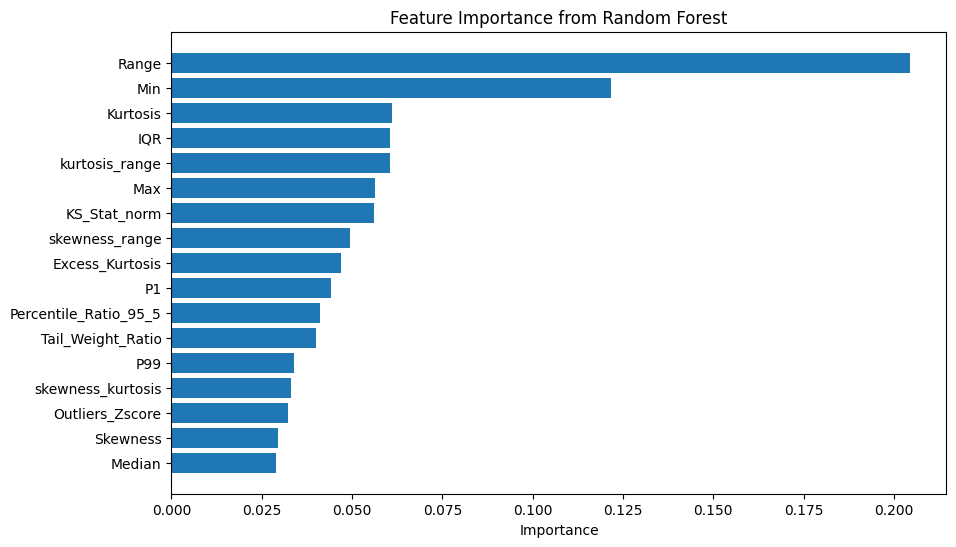

In [177]:
columns_to_drop = ['Target', 'Name', 'Distribution Type']
X = test.drop(columns=columns_to_drop)  # Features
y = y_encoded_test 

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

In [182]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))

Accuracy: 0.9060773480662984
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89        76
           1       0.95      0.89      0.92       105

    accuracy                           0.91       181
   macro avg       0.90      0.91      0.90       181
weighted avg       0.91      0.91      0.91       181



# Encoding target variable 
Transforming the target labels (distributions) into discrete values which model can better take in

In [148]:
# encoding the target variable into numerical value (binary)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df_final_yk_nonull['Target'])

# Feature Importance
Visualize the influence of each feature on predicting the target variable

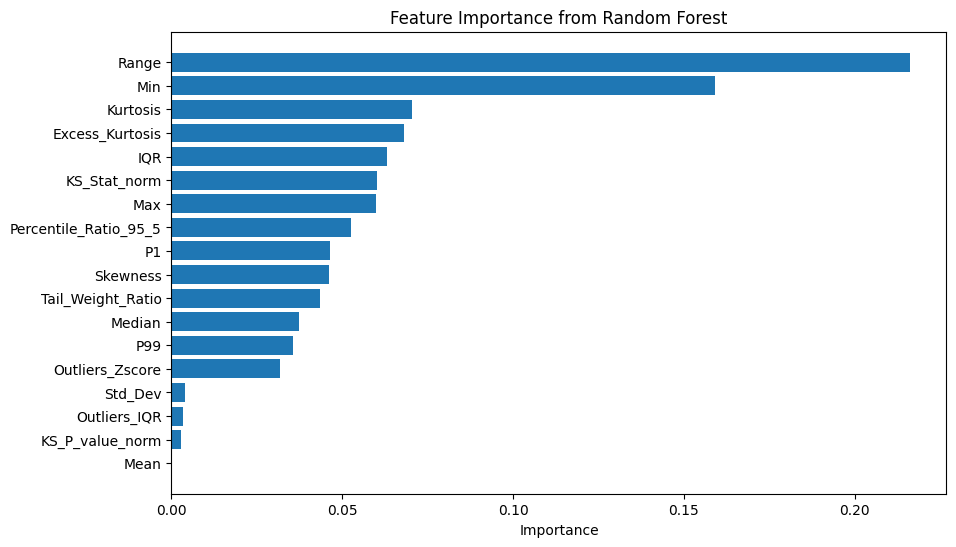

In [164]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

columns_to_drop = ['Target', 'Name', 'Distribution Type']
X = df_final_yk_nonull.drop(columns=columns_to_drop)  # Features
y = y_encoded #df_final_yk_nonull['Target']  

model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

# Split data into train and test sets for modelling

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Model Evaluation

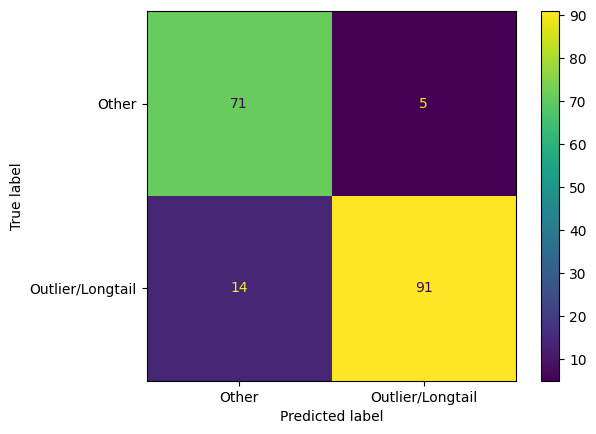

In [166]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot()

In [167]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

                  precision    recall  f1-score   support

           Other       0.84      0.93      0.88        76
Outlier/Longtail       0.95      0.87      0.91       105

        accuracy                           0.90       181
       macro avg       0.89      0.90      0.89       181
    weighted avg       0.90      0.90      0.90       181



In [168]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8950276243093923


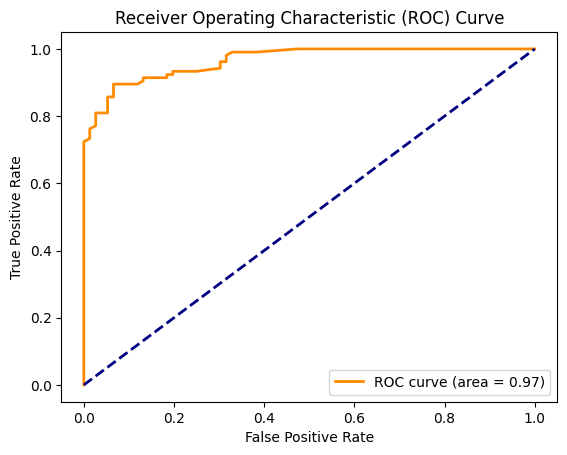

In [114]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Hyperparameter Tuning
Using cross-validation

In [115]:
# check parameters of default model
params = model.get_params()
print(params)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [116]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}


# Tuning the model with new hyperparameters

In [117]:
#Train model using best parameters from cross validation
best_params = grid_search.best_params_
tuned_model = RandomForestClassifier(**best_params)

tuned_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [118]:
y_pred_tuned = tuned_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_tuned))


Accuracy: 0.9005524861878453
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89        76
           1       0.95      0.88      0.91       105

    accuracy                           0.90       181
   macro avg       0.90      0.91      0.90       181
weighted avg       0.91      0.90      0.90       181



## Reducing feature space 
Propose to try different methods for reducing features:
1. PCA dimensionality reduction
2. Clustering using Kmeans, then sample from every cluster
3. Stratified sampling with binning

Propose to engineer new features (additional) regardless of method chosen above:
1. Mean/median/mode
2. Z-score and IQR labelling 
3. Skewness and kurtosis

At the end, to find out if:
1. Is converting feature space to just the additional features (solely statistical parameters or outlier statistics) without the test data better?
2. For blunderbuss with 6 different classes, how to balance data set? (previous method was trimming)
3. Is model necessary? Or is pipeline of statisical analysis enough to classify the exact distribution?
4. Is there a way to standardize the labelling of distribution? (currently based on 3 employees' judgements) -> this is to prevent model from being trained just on their judgements, or even worse just on one of their judgements

# Binning with stratisfied sampling

In [ ]:
# Function to bin data based on quantiles
def bin_data(df, num_bins):
    new_df = []
    for index, row in df.iterrows():
        values = row['Data']
        label = row['new_label']

        if len(pd.unique(values)) <= 2:
            # Directly use the binary values since not enough unique values to granularly separate into bins
            binned_values = values.astype(int)
        else:
            binned_values = pd.qcut(values, num_bins, labels=False, duplicates='drop')

        new_df.append({
        'data': values,
        'bin': binned_values,
        'label': label
        })
    return pd.DataFrame(new_df)

In [ ]:
df_binned = bin_data(df_binary, 5000)

In [ ]:
df_binned[df_binned['label'] != 'Other']

,data,bin,label
1,"[0.399193055385744, 0.39744059991033953, 0.396...","[65, 64, 63, 1086, 1086, 1086, 1209, 1209, 120...",Outlier/Longtail
2,"[0.0, 0.0002055076037813399, 0.000308261405672...","[0, 3, 5, 7, 9, 11, 13, 15, 18, 20, 22, 24, 26...",Outlier/Longtail
84,"[0.3804993788936786, 0.3871456870753418, 0.428...","[1870, 2025, 3113, 4009, 2263, 2854, 4987, 182...",Outlier/Longtail
85,"[0.38633312616532045, 0.439285270354258, 0.468...","[1578, 2826, 3572, 3689, 2337, 2946, 4980, 179...",Outlier/Longtail
86,"[0.7492980162046248, 0.7903511002021304, 0.730...","[1377, 4484, 477, 3046, 4369, 373, 2418, 4319,...",Outlier/Longtail
...,...,...,...
983,"[0.3555555555555556, 0.3111111111111111, 0.377...","[12, 10, 13, 15, 13, 8, 16, 11, 12, 18, 7, 11,...",Outlier/Longtail
984,"[0.33890414229437726, 0.4501611555449443, 0.34...","[537, 1553, 627, 943, 420, 844, 1281, 1591, 50...",Outlier/Longtail
985,"[0.512159603902723, 0.6807921945536624, 0.5229...","[706, 1981, 785, 1324, 568, 829, 1796, 1954, 5...",Outlier/Longtail
986,"[0.4927363972530374, 0.6436872688853672, 0.506...","[663, 1911, 774, 1167, 550, 983, 1800, 1844, 6...",Outlier/Longtail


In [ ]:
def sample_from_bins(row, num_samples):
    data = row['data']
    bins = row['bin']
    
    data_array = np.array(data)
    bins_array = np.array(bins)
    
    unique_bins = np.unique(bins_array)
    
    sampled_data = []
    sampled_bins = []

    num_samples_per_bin = num_samples // len(unique_bins)
    
    for b in unique_bins:
        bin_indices = np.where(bins_array == b)[0]
        sampled_indices = np.random.choice(bin_indices, min(len(bin_indices), num_samples_per_bin), replace=False)

        sampled_data.extend(data_array[sampled_indices])
        sampled_bins.extend(bins_array[sampled_indices])
    
    # If the total number of sampled data points is less than num_samples, fill the remaining with data points
    if len(sampled_data) < num_samples:
        additional_samples = num_samples - len(sampled_data)
        additional_indices = np.random.choice(len(data_array), additional_samples, replace=False)
        sampled_data.extend(data_array[additional_indices])
        sampled_bins.extend(bins_array[additional_indices])
    
    return pd.Series({'data': sampled_data, 'bin': sampled_bins, 'label': row['label']})


In [ ]:
def apply_sampling(df, num_samples):
    df_sampled = df.apply(lambda row: sample_from_bins(row, num_samples), axis=1)
    return df_sampled

In [ ]:
df_sampled = apply_sampling(df_binned, 5000)

In [ ]:
print(df_sampled.head())

#Check if entries in data/bin has only 5000 values (downsampled)
len(pd.Series(df_sampled['data'][0]))

                                                data  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [0.10037901944002936, 0.0, 0.10037901944002936...   
2  [5.1376900945334976e-05, 0.0001027538018906699...   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                 bin             label  
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...             Other  
1  [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, ...  Outlier/Longtail  
2  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  Outlier/Longtail  
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...             Other  
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...             Other  


5000

# PCA

In [ ]:
from sklearn.decomposition import PCA

#rows as chips and columns as tests
pca = PCA(n_components=5000)
reduced_data = pca.fit_transform(data)